# MOSTA
This tutorial provides an example of identifying spatial domain for Mouse Organogenesis Spatiotemporal Transcriptomic Atlas (MOSTA).


## Preparation

In [2]:
import warnings
warnings.filterwarnings("ignore")
import DisConST
import rpy2.robjects as robjects
import rpy2.robjects.numpy2ri
import anndata as ad
import scanpy as sc
import pandas as pd
import numpy as np
import scipy.sparse as sp
import scipy.linalg
import torch
from sklearn.metrics import adjusted_rand_score as ari_score
used_device = torch.device('cuda:1' if torch.cuda.is_available() else 'cpu')

## Load Data

In [17]:
adata = sc.read_h5ad('./Data/MOSTA/E9.5_E2S3.MOSTA.h5ad')

## Preprocess

In [18]:
DisConST.generate_spatial_graph(adata, knears=10,self_loops=False)
adata = DisConST.preprocess(adata,data='gene')

graph includs edges: 45531
Graph construction completed!
Size factor calculation completed!
Data preprocessing completed!


## Train

In [27]:
adata = DisConST.train_DisConST(adata, data='gene', size_factors_gene = adata.obs['size_factor_g'],csl_l_g =10,kner=10, random_seed=1, device=used_device)

Negative spots selection completed!
training RNA-seq data...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:46<00:00, 21.73it/s]


## Clustering

In [28]:
DisConST.mclust_R(adata, num_cluster=13, used_obsm='STgene', domain_obs='gene_label')
ari_gene=ari_score(adata.obs['annotation'], adata.obs['gene_label'])
ari_gene

fitting ...
  |======================================================================| 100%


0.46141686978025703

## Visualization

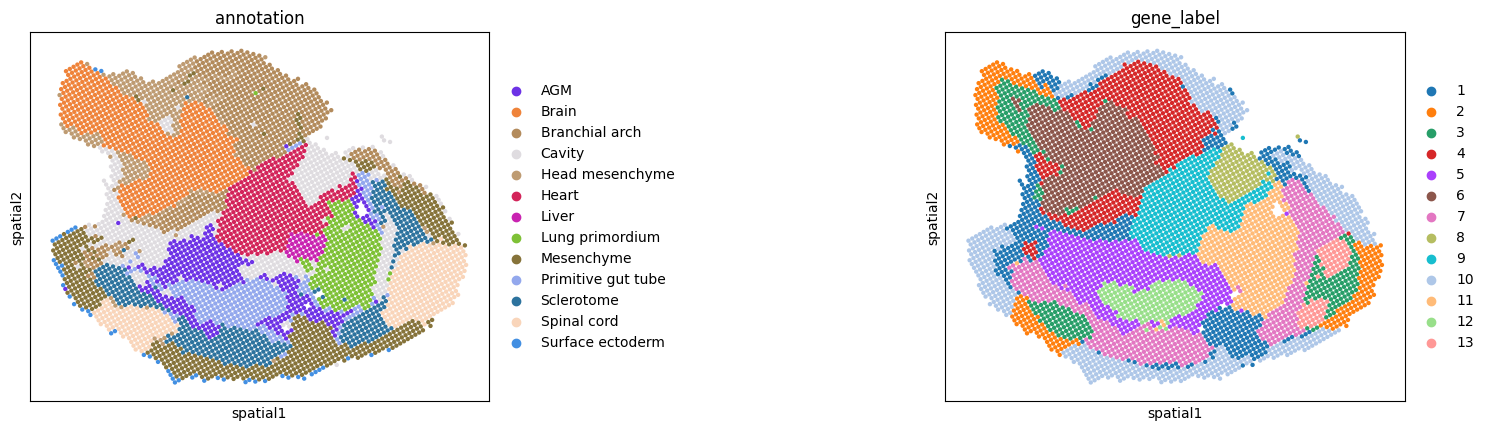

In [35]:
sc.pl.spatial(adata, color=['annotation','gene_label'],spot_size=1,ncols=2, frameon=True,wspace=0.5)

# MOSTA(seqFISH)

In [43]:
adata = sc.read_h5ad('./Data/MOSTA.h5ad')
DisConST.generate_spatial_graph(adata, knears=8,self_loops=True)
adata = DisConST.preprocess(adata,data='gene')
adata = DisConST.train_DisConST(adata, data='gene', size_factors_gene = adata.obs['size_factor_g'],hidden_dims_gene = [351, 128, 30],csl_l_g =5, random_seed=1402, device=used_device)
DisConST.mclust_R(adata, num_cluster=22, used_obsm='STgene', domain_obs='gene_label')
ari_gene=ari_score(adata.obs['celltype_mapped_refined'], adata.obs['gene_label'])
ari_gene

graph includs edges: 155328
Graph construction completed!
Size factor calculation completed!
Data preprocessing completed!
Negative spots selection completed!
training RNA-seq data...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:25<00:00, 38.61it/s]


fitting ...
  |======================================================================| 100%


0.39448401998710486

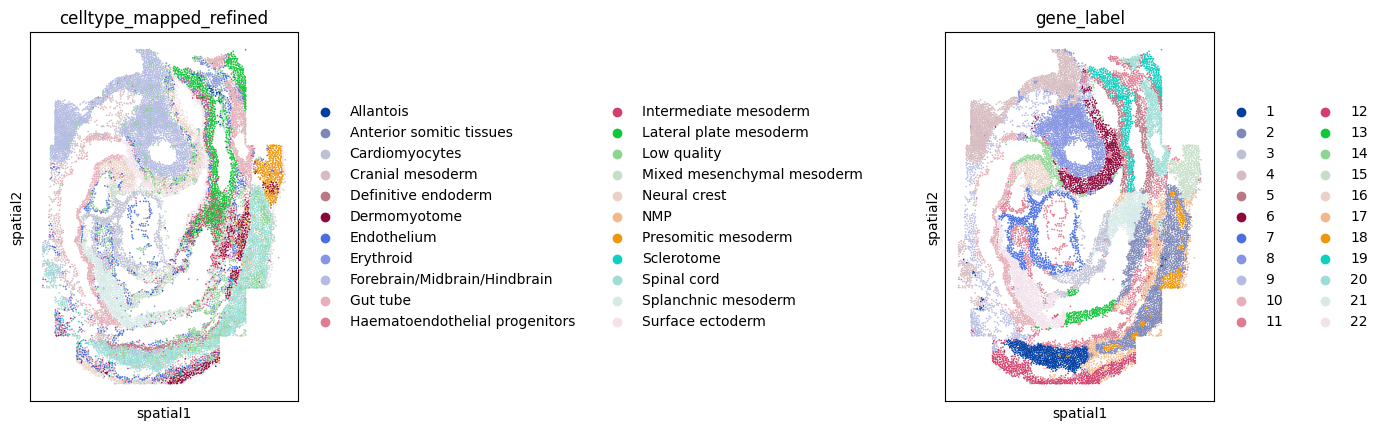

In [44]:
sc.pl.spatial(adata, img_key=None, color=['celltype_mapped_refined','gene_label'],size=0.1,spot_size=0.35,frameon=True,wspace=0.5)